In [ ]:
#Esto es un programa de analisis de sentimientos en Reddit
!pip install textblob spacy vaderSentiment nltk wordcloud matplotlib
!python -m textblob.download_corpora
!python -m spacy download es_core_news_sm

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 85.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dep

In [ ]:
#Importar librerias
import re
import unicodedata
import spacy
import praw
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import time

In [ ]:
# Autenticación en Reddit con PRAW
reddit = praw.Reddit(
    client_id="NEGS3QsSHL9JRx6bJE8vvw",
    client_secret="GvdXhnOY6VbbBdJLKy612MYlOkzoWA",
    user_agent="Sentiment Analyzer by /u/vaulent"
)


In [ ]:
# Lista de subreddits donde buscar
subreddits = ["personalfinance"]

# Lista de términos de búsqueda relacionados con créditos hipotecarios
search_queries = ["mortgage"]


In [ ]:
#Evitar duplicados con un conjunto (set)
comments_set = set()

In [ ]:
for subreddit_name in subreddits:
    try:
        subreddit = reddit.subreddit(subreddit_name)
        print(f"Buscando en r/{subreddit_name}...")

        for query in search_queries:
            try:
                print(f"Buscando: '{query}'...")
                for submission in subreddit.search(query, limit=300):  # Puedes cambiar el límite
                    submission.comments.replace_more(limit=0)  # Evitar "MoreComments"

                    for comment in submission.comments.list():
                        comments_set.add(comment.body)  # Agregar comentario al set

                time.sleep(1)  # Evita sobrecargar la API de Reddit

            except Exception as e:
                print(f"Error en búsqueda '{query}': {e}")

    except Exception as e:
        print(f"No se pudo acceder a r/{subreddit_name}: {e}")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Buscando en r/personalfinance...
Buscando: 'mortgage'...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
# Convertir comentarios a DataFrame
df = pd.DataFrame(list(comments_set), columns=['texto'])

In [ ]:
if df.empty:
    print("⚠ No se encontraron comentarios. Revisa los subreddits y términos de búsqueda.")
else:
    print(f"✅ Se obtuvieron {len(df)} comentarios únicos.")

✅ Se obtuvieron 64368 comentarios únicos.


In [ ]:
# Función para limpiar texto
def clean_text(text):
    text = str(text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Eliminar menciones
    text = re.sub(r'#', '', text)  # Eliminar hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Eliminar RT
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Eliminar URLs
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    text = text.lower()  # Convertir a minúsculas
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')  # Quitar acentos
    return text

In [ ]:
# Aplicar limpieza
df['Cleaned_Text'] = df['texto'].apply(clean_text)

In [ ]:
# Inicializar analizador de sentimientos
analyzer = SentimentIntensityAnalyzer()

# Funciones para análisis de sentimientos
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score < 0:
        return 'Negativo'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positivo'

In [ ]:
# Aplicar análisis
df['Polarity'] = df['Cleaned_Text'].apply(get_polarity)
df['Subjectivity'] = df['Cleaned_Text'].apply(get_subjectivity)
df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)

In [ ]:
# Mostrar los primeros resultados
print(df.head())

                                               texto  \
0  You could get as low as 1.875 on a 10 year rig...   
1  Did car prices go down after 100 years of buil...   
2  Absolutely not, unless you are willing and cap...   
3  Maybe you don't, though. If it's invested in t...   
4  You are not supposed to change employment or f...   

                                        Cleaned_Text  Polarity  Subjectivity  \
0  you could get as low as 1875 on a 10 year righ...  0.142857      0.417857   
1  did car prices go down after 100 years of buil...  0.014815      0.329630   
2  absolutely not unless you are willing and capa...  0.207870      0.436574   
3  maybe you dont though if its invested in the m... -0.111111      0.077778   
4  you are not supposed to change employment or f... -0.096296      0.911111   

  Sentiment  
0  Negativo  
1   Neutral  
2  Positivo  
3  Negativo  
4  Negativo  


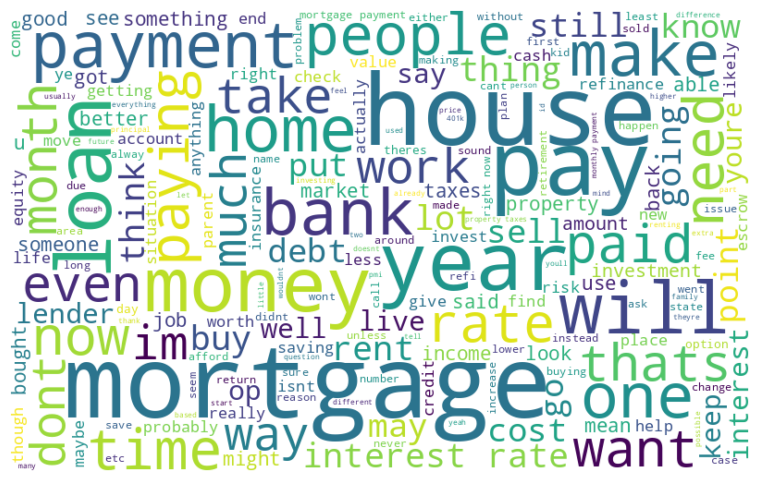

In [ ]:
# Generar una nube de palabras
all_words = ' '.join([text for text in df['Cleaned_Text']])
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

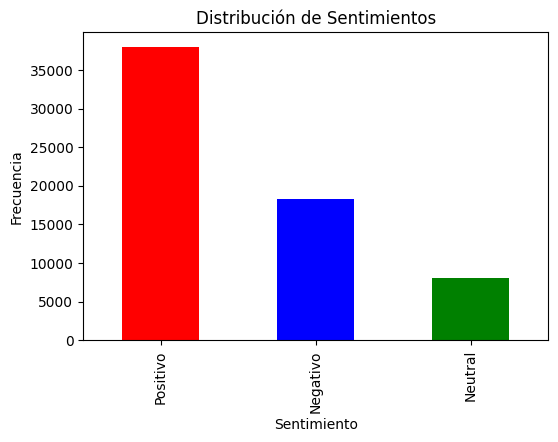

In [ ]:
# Graficar distribución de análisis de sentimientos
plt.figure(figsize=(6, 4))
df['Sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()